In [2]:
import pandas as pd

file_path = "Данные для тестового задания - Данные об аудитории.csv"  # Укажи реальный путь
df = pd.read_csv(file_path, encoding="utf-8")
df.head()

,date,user_id,view_adverts
0,2023-11-11,8c020470-8461-11ed-83d0-552e8cc749d6,13
1,2023-11-18,5875f070-7b92-11ee-a6fb-8b298e83f4f7,14
2,2023-11-29,3c2d27c0-4fd6-11eb-b89f-2ffb31b67dd6,21
3,2023-11-29,234a96d0-ad16-11ed-a2e6-793ddfeeba1f,23
4,2023-11-29,4d07c180-644f-11eb-879c-b7c02edf4f37,12


In [16]:
import pandas as pd

# Загружаем данные
file_path = "Данные для тестового задания.xlsx"

df_audience = pd.read_excel(file_path, sheet_name="Данные об аудитории")
df_ab_test = pd.read_excel(file_path, sheet_name="Данные АБ тестов")
df_listers = pd.read_excel(file_path, sheet_name="Листеры")

In [17]:
print("Данные об аудитории:")
print(df_audience.head())

print("\nДанные АБ тестов:")
print(df_ab_test.head())

print("\nЛистеры:")
print(df_listers.head())

Данные об аудитории:
        date                               user_id  view_adverts
0 2023-11-11  8c020470-8461-11ed-83d0-552e8cc749d6            13
1 2023-11-18  5875f070-7b92-11ee-a6fb-8b298e83f4f7            14
2 2023-11-29  3c2d27c0-4fd6-11eb-b89f-2ffb31b67dd6            21
3 2023-11-29  234a96d0-ad16-11ed-a2e6-793ddfeeba1f            23
4 2023-11-29  4d07c180-644f-11eb-879c-b7c02edf4f37            12

Данные АБ тестов:
   experiment_num experiment_group   user_id  revenue
0               1             test     38456      520
1               1          control  13125924      806
2               1          control   9761984        0
3               1             test  11387012      208
4               1             test  18319648      104

Листеры:
   user_id       date  cnt_adverts  age  cnt_contacts  revenue
0      100 2022-01-01            6   21           119       53
1      100 2022-01-02            2   21           200       18
2      100 2022-01-03            6   21        

In [18]:
df_audience["month"] = df_audience["date"].dt.to_period("M")  # Добавляем столбец с месяцем
mau = df_audience.groupby("month")["user_id"].nunique().mean()  # Среднее число уникальных пользователей в месяц
print(f"MAU: {int(mau)}")

MAU: 7639


In [19]:
dau = df_audience.groupby("date")["user_id"].nunique().mean()
print(f"Средний DAU: {int(dau)}")

Средний DAU: 560


In [26]:
import pandas as pd

# Загружаем данные
file_path = "Данные для тестового задания.xlsx"
df = pd.read_excel(file_path, sheet_name="Данные об аудитории")

# Приводим дату к формату datetime
df['date'] = pd.to_datetime(df['date'])

# Выбираем пользователей, впервые зашедших 1 ноября
nov_1_users = df[df['date'] == '2023-11-01']['user_id'].unique()

# Проверяем, сколько из них вернулись 2 ноября
nov_2_users = df[(df['date'] == '2023-11-02') & (df['user_id'].isin(nov_1_users))]['user_id'].nunique()

# Общая численность новых пользователей 1 ноября
total_nov_1 = len(nov_1_users)

# Считаем Retention D1
retention_d1 = (nov_2_users / total_nov_1) * 100 if total_nov_1 > 0 else 0

print(f"Retention D1: {retention_d1:.1f}%")

Retention D1: 26.6%


In [33]:
import pandas as pd


data = {
    "date": ["2023-11-01", "2023-11-01", "2023-11-01", "2023-11-02", "2023-11-02"],
    "user_id": ["user_1", "user_2", "user_3", "user_1", "user_4"],
    "view_adverts": [5, 7, 10, 3, 6]  # Количество просмотров рекламы (не влияет на расчет)
}

df = pd.DataFrame(data)

# Преобразуем дату в формат datetime
df["date"] = pd.to_datetime(df["date"])

# Находим пользователей, пришедших 1 ноября
nov_1_users = df[df["date"] == "2023-11-01"]["user_id"].unique()

# Определяем, сколько из них вернулись 2 ноября
retained_users = df[(df["date"] == "2023-11-02") & (df["user_id"].isin(nov_1_users))]["user_id"].nunique()

# Общее число пользователей 1 ноября
total_users_nov1 = len(nov_1_users)

# Вычисляем Retention первого дня
retention_day1 = (retained_users / total_users_nov1) * 100

print(f"Retention первого дня: {retention_day1:.1f}%")

Retention первого дня: 33.3%


In [31]:
import pandas as pd

# Загружаем данные
df = pd.read_excel("Данные для тестового задания.xlsx", parse_dates=["date"])

# Фильтруем пользователей только за ноябрь 2023
df_november = df[(df["date"].dt.month == 11) & (df["date"].dt.year == 2023)]

# Общее количество уникальных пользователей
total_users = df_november["user_id"].nunique()

# Количество пользователей, которые посмотрели хотя бы одно объявление
users_who_viewed = df_november[df_november["view_adverts"] > 0]["user_id"].nunique()

# Вычисляем конверсию
conversion_rate = (users_who_viewed / total_users) * 100
print(f"Конверсия: {conversion_rate:.1f}%")

Конверсия: 46.3%


In [34]:
import pandas as pd

# Загружаем данные
df = pd.read_excel("Данные для тестового задания.xlsx")  

# Преобразуем дату в нужный формат
df["date"] = pd.to_datetime(df["date"])

# Фильтруем данные за ноябрь 2023
df_november = df[df["date"].dt.strftime('%Y-%m') == "2023-11"]

# Считаем общее количество просмотров и уникальных пользователей
total_views = df_november["view_adverts"].sum()
unique_users = df_november["user_id"].nunique()

# Рассчитываем среднее количество просмотров на пользователя
average_views = total_views / unique_users

print(f"Среднее количество просмотренных объявлений на пользователя в ноябре: {average_views}")

Среднее количество просмотренных объявлений на пользователя в ноябре: 2.8687000916350307


In [35]:
# Данные
total_users = 2000
detractors = 500
promoters = 1200

# Расчет процентов
detractors_percent = (detractors / total_users) * 100
promoters_percent = (promoters / total_users) * 100

# Вычисление NPS
nps = promoters_percent - detractors_percent

print(f"NPS: {nps}")

NPS: 35.0


In [36]:
import pandas as pd

# Загружаем данные из Excel
df = pd.read_excel("Данные для тестового задания.xlsx") 

In [39]:
df = pd.read_excel("Данные для тестового задания.xlsx", sheet_name="Данные АБ тестов")

In [41]:
import scipy.stats as stats
results = []
for exp_num in df['experiment_num'].unique():
    exp_data = df[df['experiment_num'] == exp_num]
    
    # Разделение на группы
    control = exp_data[exp_data['experiment_group'] == 'control']['revenue']
    test = exp_data[exp_data['experiment_group'] == 'test']['revenue']
    
    # t-тест для проверки различий в ARPU
    t_stat, p_value = stats.ttest_ind(test, control, equal_var=False)
    
    # Запись результатов
    results.append((exp_num, test.mean(), control.mean(), p_value))

# Вывод результатов
for res in results:
    print(f"Эксперимент {res[0]}:")
    print(f"  Средний ARPU (Test): {res[1]:.2f}")
    print(f"  Средний ARPU (Control): {res[2]:.2f}")
    print(f"  p-value: {res[3]:.5f}\n")

Эксперимент 1:
  Средний ARPU (Test): 665.74
  Средний ARPU (Control): 722.46
  p-value: 0.68897

Эксперимент 2:
  Средний ARPU (Test): 332.93
  Средний ARPU (Control): 704.65
  p-value: 0.00113

Эксперимент 3:
  Средний ARPU (Test): 998.67
  Средний ARPU (Control): 663.21
  p-value: 0.06032



In [42]:
import pandas as pd

# Загрузка данных
df = pd.read_excel("Данные для тестового задания.xlsx", sheet_name="Листеры") 

# Расчет ARPU
total_revenue = df["revenue"].sum()
unique_users = df["user_id"].nunique()
arpu = total_revenue / unique_users

print(f"Средний доход на пользователя (ARPU): {arpu:.2f}")

Средний доход на пользователя (ARPU): 156.48


In [43]:
import pandas as pd

# Загрузка данных
df = pd.read_excel("Данные для тестового задания.xlsx", sheet_name="Листеры") 

# Расчет медианы возраста
median_age = df["age"].median()

print(f"Медианный возраст пользователей: {median_age:.1f}")

Медианный возраст пользователей: 28.0


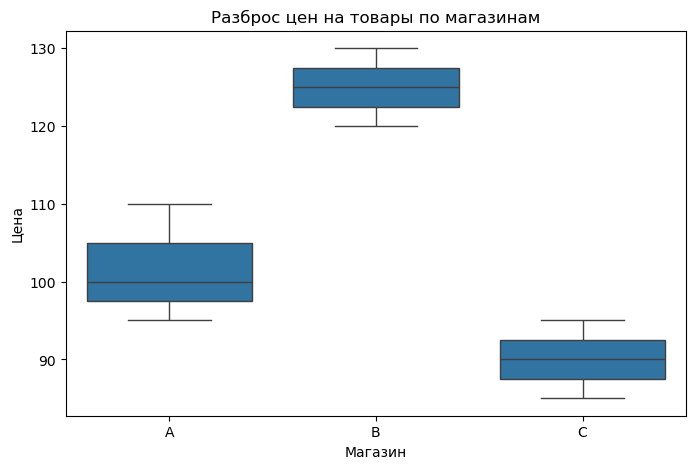

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
df = pd.DataFrame({
    "store": ["A", "A", "A", "B", "B", "B", "C", "C", "C"],
    "price": [100, 110, 95, 120, 130, 125, 90, 85, 95]
})

# Создаем boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="store", y="price", data=df)
plt.xlabel("Магазин")
plt.ylabel("Цена")
plt.title("Разброс цен на товары по магазинам")
plt.show()

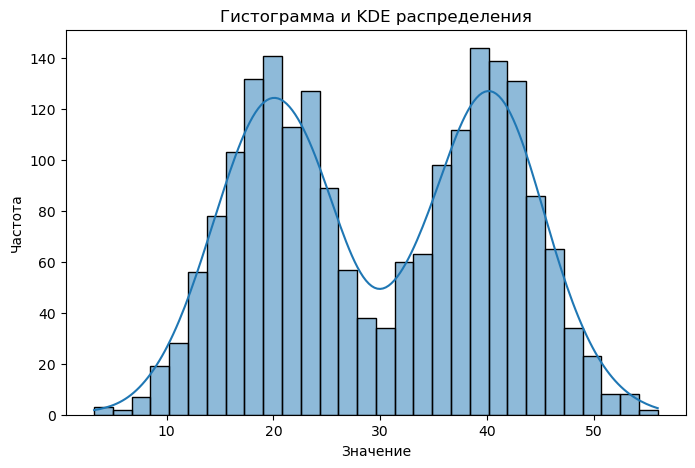

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Генерируем случайные данные с бимодальным распределением
data1 = np.random.normal(20, 5, 1000)
data2 = np.random.normal(40, 5, 1000)
data = np.concatenate([data1, data2])

# Построение гистограммы с KDE
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True)
plt.title("Гистограмма и KDE распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

        date                               user_id  view_adverts
0 2023-11-11  8c020470-8461-11ed-83d0-552e8cc749d6            13
1 2023-11-18  5875f070-7b92-11ee-a6fb-8b298e83f4f7            14
2 2023-11-29  3c2d27c0-4fd6-11eb-b89f-2ffb31b67dd6            21
3 2023-11-29  234a96d0-ad16-11ed-a2e6-793ddfeeba1f            23
4 2023-11-29  4d07c180-644f-11eb-879c-b7c02edf4f37            12
Дисперсии случайных величин:
 view_adverts    13.605369
dtype: float64
Случайная величина с наибольшей дисперсией: view_adverts


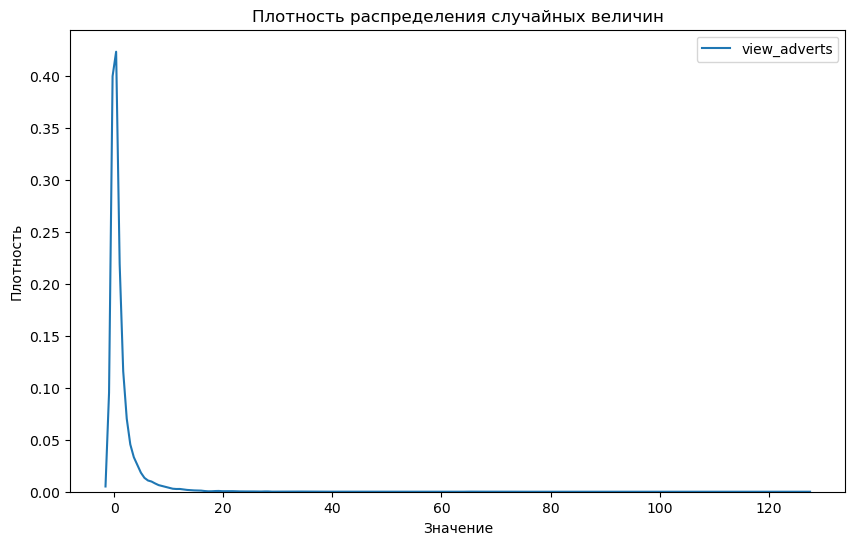

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузим данные (замени 'your_file.csv' на название файла)
df = pd.read_excel("Данные для тестового задания.xlsx")

# Посмотрим на названия колонок
print(df.head())

# Фильтруем только числовые столбцы
numeric_df = df.select_dtypes(include=[np.number])

# Вычислим дисперсию для каждой случайной величины (теперь только для числовых данных)
variances = numeric_df.var()
print("Дисперсии случайных величин:\n", variances)

# Найдём случайную величину с наибольшей дисперсией
max_variance_column = variances.idxmax()
print(f"Случайная величина с наибольшей дисперсией: {max_variance_column}")

# Визуализация плотности распределения всех случайных величин
plt.figure(figsize=(10, 6))
for column in numeric_df.columns:
    sns.kdeplot(numeric_df[column], label=column)

plt.legend()
plt.title("Плотность распределения случайных величин")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.show()

In [51]:
import scipy.stats as stats

# Примерные данные для двух выборок
sample_1 = [23, 21, 19, 24, 25, 22, 23, 20, 21, 22]
sample_2 = [30, 29, 31, 32, 30, 29, 28, 33, 30, 31]

# Выполним двухвыборочный t-тест (для проверки гипотезы о равенстве средних)
t_stat, p_value = stats.ttest_ind(sample_1, sample_2)

# Уровень значимости (alpha)
alpha = 0.05

# Выводим результаты
print(f"t-статистика: {t_stat}")
print(f"p-value: {p_value}")

# Проверка гипотезы
if p_value <= alpha:
    print("Отклоняем нулевую гипотезу: данные статистически значимы.")
else:
    print("Не отклоняем нулевую гипотезу: данные не статистически значимы.")

t-статистика: -11.12449958505838
p-value: 1.691513200661755e-09
Отклоняем нулевую гипотезу: данные статистически значимы.


In [52]:
import scipy.stats as stats
import numpy as np

# Примерные данные для двух выборок
sample_1 = [23, 21, 19, 24, 25, 22, 23, 20, 21, 22]
sample_2 = [30, 29, 31, 32, 30, 29, 28, 33, 30, 31]

# Проверка на нормальность данных с использованием теста Шапиро-Уилка
shapiro_test_1 = stats.shapiro(sample_1)
shapiro_test_2 = stats.shapiro(sample_2)

print(f"Тест Шапиро-Уилка для sample_1: p-value = {shapiro_test_1.pvalue}")
print(f"Тест Шапиро-Уилка для sample_2: p-value = {shapiro_test_2.pvalue}")

# Если p-value < 0.05, то данные не нормальны, в противном случае они нормальны
if shapiro_test_1.pvalue < 0.05 or shapiro_test_2.pvalue < 0.05:
    print("Одна или обе выборки не нормальны.")
else:
    print("Обе выборки нормальны.")

# Проверка на равенство дисперсий с помощью теста Левене
levene_test = stats.levene(sample_1, sample_2)
print(f"Тест Левене: p-value = {levene_test.pvalue}")

# Если p-value < 0.05, то дисперсии выборок разные, в противном случае они равны
if levene_test.pvalue < 0.05:
    print("Дисперсии выборок разные. Будем использовать Welch's t-test.")
    # Выполним Welch's t-test, если дисперсии разные
    t_stat, p_value = stats.ttest_ind(sample_1, sample_2, equal_var=False)
else:
    print("Дисперсии выборок равны. Будем использовать стандартный t-тест.")
    # Выполним стандартный t-тест, если дисперсии равны
    t_stat, p_value = stats.ttest_ind(sample_1, sample_2)

# Уровень значимости (alpha)
alpha = 0.05

# Выводим результаты
print(f"t-статистика: {t_stat}")
print(f"p-value: {p_value}")

# Проверка гипотезы
if p_value <= alpha:
    print("Отклоняем нулевую гипотезу: данные статистически значимы.")
else:
    print("Не отклоняем нулевую гипотезу: данные не статистически значимы.")

Тест Шапиро-Уилка для sample_1: p-value = 0.9819299383121692
Тест Шапиро-Уилка для sample_2: p-value = 0.8539548329946732
Обе выборки нормальны.
Тест Левене: p-value = 0.5252701050338544
Дисперсии выборок равны. Будем использовать стандартный t-тест.
t-статистика: -11.12449958505838
p-value: 1.691513200661755e-09
Отклоняем нулевую гипотезу: данные статистически значимы.


In [53]:
import pandas as pd
import numpy as np

# Пример данных о доходах пользователей
data = [30000, 25000, 40000, 50000, 80000, 120000, 150000, 20000, 220000, 35000]

# Создаем DataFrame для удобства
df = pd.DataFrame(data, columns=['Income'])

# Вычисляем квартильные значения
Q1 = df['Income'].quantile(0.25)  # Первый квартиль
Q2 = df['Income'].quantile(0.5)   # Медиана (второй квартиль)
Q3 = df['Income'].quantile(0.75)  # Третий квартиль
IQR = Q3 - Q1  # Межквартильный размах

# Выводим результаты
print(f"Первый квартиль (Q1): {Q1}")
print(f"Медиана (Q2): {Q2}")
print(f"Третий квартиль (Q3): {Q3}")
print(f"Межквартильный размах (IQR): {IQR}")

# Вычислим минимальный и максимальный доход
min_income = df['Income'].min()
max_income = df['Income'].max()

print(f"Минимальный доход: {min_income}")
print(f"Максимальный доход: {max_income}")

Первый квартиль (Q1): 31250.0
Медиана (Q2): 45000.0
Третий квартиль (Q3): 110000.0
Межквартильный размах (IQR): 78750.0
Минимальный доход: 20000
Максимальный доход: 220000


In [54]:
import numpy as np
import scipy.stats as stats

# Данные
visitors_A = 100047501
visitors_B = 100001055
payments_A = 1003
payments_B = 1099

# Конверсии для каждой группы
p_A = payments_A / visitors_A
p_B = payments_B / visitors_B

# Общая конверсия
p = (payments_A + payments_B) / (visitors_A + visitors_B)

# Размеры выборок
n_A = visitors_A
n_B = visitors_B

# Вычисляем z-статистику
z = (p_A - p_B) / np.sqrt(p * (1 - p) * (1/n_A + 1/n_B))

# Критическое значение для уровня значимости 0.05
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)

# Результат
print(f"z-статистика: {z}")
print(f"Критическое значение z: {z_critical}")

# Проверка на статистическую значимость
if abs(z) > z_critical:
    print("Отклоняем нулевую гипотезу: существует статистически значимая разница.")
else:
    print("Не отклоняем нулевую гипотезу: статистически значимой разницы нет.")

z-статистика: -2.1045506019397746
Критическое значение z: 1.959963984540054
Отклоняем нулевую гипотезу: существует статистически значимая разница.
